In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2

In [2]:
image=cv2.imread('elon.jpeg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

## Plotting input image and histogram oriented image

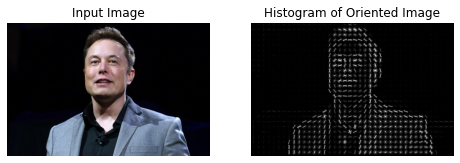

In [3]:
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis("off")
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')

# Rescalling for better display
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Image')
plt.show()

## Face Detection

In [4]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

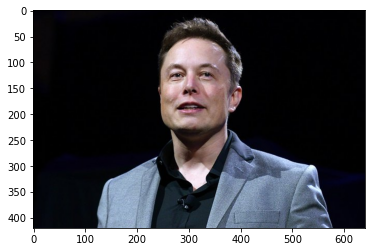

In [5]:
# Loading jpeg file into a numpy array
image=cv2.imread('elon.jpeg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [6]:
# Finding all the faces in the image
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} face(s) in input image".format(number_of_faces))

Found 1 face(s) in input image


A face is located at pixel location Top:239,Left:96,Bottom:368,Right:225


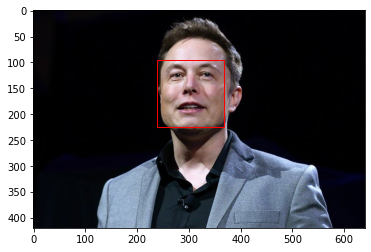

In [7]:
# Get axis handle
plt.imshow(image)
ax=plt.gca()

# Let us repeat for all faces found
for face_location in face_locations:
    top,right,bottom,left=face_location
    x,y,w,h=left,top,right,bottom
    print('A face is located at pixel location Top:{},Left:{},Bottom:{},Right:{}'.format(x,y,w,h))
    
    #Drawing box around the face
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)

#Lets print the image
plt.show()

In [47]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [48]:
# Let us load the known images (creating database)

#Elon Musk
image=cv2.imread('elon.jpeg')
elon=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Bill Gates
image=cv2.imread('billgates.jpg')
Bill_Gates=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Jeff Bezos
image=cv2.imread('jeff.jpg')
Jeff=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Mark_Zuckerberg
image=cv2.imread('mark.jpg')
Mark=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

## encoding the faces

In [49]:
elon_encoding=face_recognition.face_encodings(elon)[0]
bill_encoding=face_recognition.face_encodings(Bill_Gates)[0]
Jeff_encoding=face_recognition.face_encodings(Jeff)[0]
Mark_encoding=face_recognition.face_encodings(Mark)[0]

In [54]:
known_face_encodings=[elon_encoding,bill_encoding,Jeff_encoding,Mark_encoding]

## Load the image you want to check

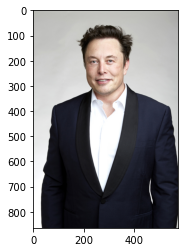

In [81]:
image=cv2.imread('elon2.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [82]:
from scipy.spatial import distance

## It's testing time!

In [83]:
# If there is more than one face so we need to loop through all the faces
for unknown_face_encoding in unknown_face_encodings:
    #Let us if this unkown_encoding matches any of the faces we know
    results=[]
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding,unknown_face_encoding)
        results.append(d)
        
    threshold=0.6
    results=np.array(results)<=threshold
    name='Unknown'
    if results[0]:
        name='Elon Musk'
    elif results[1]:
        name='Bill Gates'
    elif results[2]:
        name='Jeff Bezos'
    elif results[3]:
        name='Mark Zuckerberg'
    print(f'Found {name} in the photo!')
    
        

Found Elon Musk in the photo!


## Great! The Face Recognition System is working absolutely perfect